In [1]:
from helper import merge_dataframes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



                brand                     Model  Score
62548             Gmc        Sierra 1500 Denali     10
38523        Chrysler  Pacifica Hybrid Pinnacle     10
38528        Chrysler          Pacifica Limited     10
38530        Chrysler        Pacifica Touring-L     10
38532        Chrysler        Pacifica Touring-L     10
...               ...                       ...    ...
133875         Nissan              Gt-R Premium      2
33261       Chevrolet              Corvette Z06      2
32628       Chevrolet              Corvette Z06      2
125096  Mercedes_Benz            Amg Gt 53 Base      2
143968        Porsche           918 Spyder Base      1

[175490 rows x 3 columns]
         brand                                    Model  Score
2634       Kia  Sportage Plug-In Hybrid X-Line Prestige   10.0
3937    Nissan                            Z Performance   10.0
4024   Porsche                               Cayman Gts   10.0
4022   Porsche                     Cayman Black Edition   10.

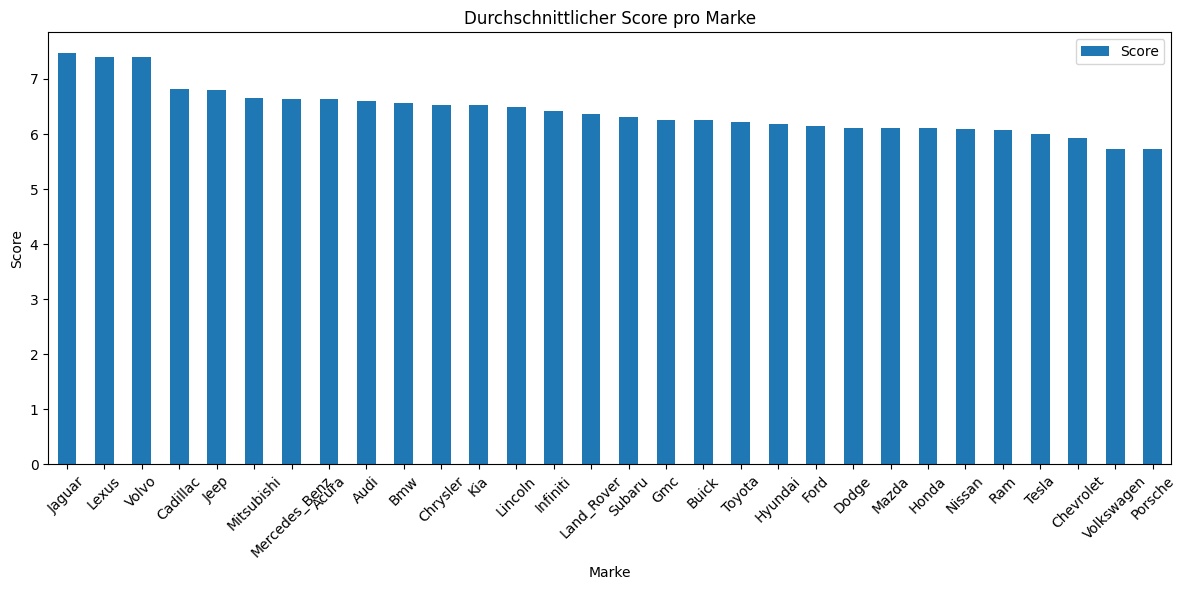

In [2]:
from helper import merge_dataframes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

file1_path = 'data/NewYorkCars/New_York_cars_part1.csv'
file2_path = 'data/NewYorkCars/New_York_cars_part2.csv'


data = merge_dataframes(file1_path, file2_path)

# Relevanten Plots erstellen


# Machine Learning: K-Means-Clustering und Bewertung
# Machine Learning: K-Means-Clustering und Bewertung
# Machine Learning: K-Means-Clustering und Bewertung
def perform_clustering(data):
    # Ausgewählte Merkmale für das Clustering
    features = ['money', 'Mileage']

    # Daten bereinigen
    data['MPG'] = data['MPG'].str.replace('–', '-')  # Zeichen '-' in der 'MPG'-Spalte ersetzen

    # Durchschnittswerte aus dem Bereich in der 'MPG'-Spalte berechnen
    mpg_avg = data['MPG'].str.split('-', expand=True).astype(float).mean(axis=1)
    data['MPG_avg'] = mpg_avg

    # Daten vorbereiten und fehlende Werte behandeln
    X = data[features + ['MPG_avg']]
    imp = SimpleImputer(strategy='mean')
    X_imputed = imp.fit_transform(X)

    # Daten normalisieren
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X_imputed)

    # K-Means-Clustering durchführen
    kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
    kmeans.fit(scaled_data)

    # Clusteretiketten den Daten hinzufügen
    data['Cluster'] = kmeans.labels_

    # Bewertung der Autos basierend auf dem Cluster
    data['Score'] = 10 - data['Cluster']

    # Die besten bewerteten Autos auswählen
    top_cars = data.sort_values(by='Score', ascending=False)

    return top_cars


def group_cars_and_average(data):
    # Gleiche Fahrzeugmodelle gruppieren und Durchschnitt berechnen
    grouped_cars = data.groupby(['brand', 'Model']).agg({'Score': 'mean'}).reset_index()
    grouped_cars = grouped_cars.sort_values(by='Score', ascending=False)

    return grouped_cars


def group_brands_and_average(data):
    # Brands gruppieren und Durchschnitt berechnen
    grouped_brands = data.groupby('brand').agg({'Score': 'mean'}).reset_index()
    grouped_brands = grouped_brands.sort_values(by='Score', ascending=False)

    return grouped_brands

# Plots erstellen und Bewertung durchführe
top_cars = perform_clustering(data)

# Die besten bewerteten Autos als Tabelle anzeigen
top_cars_table = top_cars[['brand', 'Model', 'Score']]
print(top_cars_table)


grouped_cars_avg = group_cars_and_average(top_cars)

# Die besten bewerteten Autos als Tabelle anzeigen
top_cars_table = grouped_cars_avg[['brand', 'Model', 'Score']]
print(top_cars_table)

top_brands_table = group_brands_and_average(top_cars_table)
print(top_brands_table)

top_brands_table.plot(x='brand', y='Score', kind='bar', figsize=(12, 6))
plt.xlabel('Marke')
plt.ylabel('Score')
plt.title('Durchschnittlicher Score pro Marke')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()